# FEATURE SELECTION METHODS

# **Variance Threshold**

In [1]:
import pandas as pd
data=pd.DataFrame({
    'age':[25,30,35,40,45],
    'salary':[5000,6000,7000,8000,9000],
    'country_code':[1,1,1,1,1]
})
data

,age,salary,country_code
0,25,5000,1
1,30,6000,1
2,35,7000,1
3,40,8000,1
4,45,9000,1


In [2]:
from sklearn.feature_selection import VarianceThreshold

selector=VarianceThreshold(threshold=0.1)
selected_data=selector.fit_transform(data)

selected_features=data.columns[selector.get_support()]
print("Selected features:",selected_features)

Selected features: Index(['age', 'salary'], dtype='object')


# **Correlation coefficient**

In [10]:
import numpy as np
df=pd.DataFrame({
    'size_sqft':[1000,1500,2000,2500,3000],
    'tiles_count':[100,150,200,250,300],
    'price':[200000,300000,400000,500000,600000]
})
df

,size_sqft,tiles_count,price
0,1000,100,200000
1,1500,150,300000
2,2000,200,400000
3,2500,250,500000
4,3000,300,600000


In [11]:
correlation_matrix=df.corr()
print(correlation_matrix)

             size_sqft  tiles_count  price
size_sqft          1.0          1.0    1.0
tiles_count        1.0          1.0    1.0
price              1.0          1.0    1.0


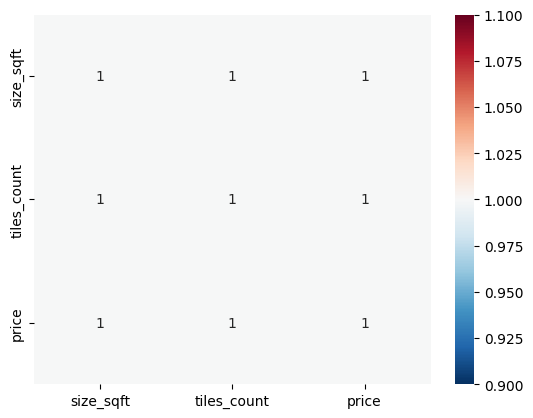

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(correlation_matrix,annot=True,cmap='RdBu_r')
plt.show()

In [15]:
#removing highly correlated features(>0.9)
upper=correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape),k=1).astype(bool)
)
to_drop=[column for column in upper.columns if any(upper[column]>0.9)]
print("Highly correlated features to drop:",to_drop)

Highly correlated features to drop: ['tiles_count', 'price']


**🏠 Scenario: Real Estate Price Prediction**

You are developing a regression model to predict house prices.

Dataset contains:  
House Size (sqft)  
Number of Tiles  
Total Construction Cost  
Number of Bedrooms  
Market Price   

After calculating correlation matrix, you find:  
House Size and Number of Tiles have 0.98 correlation  
Construction Cost is highly correlated (0.95) with House Size

❓ Question:  
Why is high correlation between features a problem?  
Which feature(s) would you remove and why?  
What issue can occur if highly correlated features are kept?  
Which filter method is appropriate here?  

In [16]:
import pandas as pd

# Sample dataset (5 rows)
df1= pd.DataFrame({
    "HouseSize_sqft": [1000, 1500, 2000, 2500, 3000],
    "Number_of_Tiles": [500, 750, 1000, 1250, 1500],   # Strongly correlated with size
    "Construction_Cost": [50, 75, 100, 125, 150],      # Also correlated with size
    "Bedrooms": [2, 3, 3, 4, 5],
    "Market_Price": [2.0, 3.0, 4.1, 5.2, 6.1]          # Target
})

df1


,HouseSize_sqft,Number_of_Tiles,Construction_Cost,Bedrooms,Market_Price
0,1000,500,50,2,2.0
1,1500,750,75,3,3.0
2,2000,1000,100,3,4.1
3,2500,1250,125,4,5.2
4,3000,1500,150,5,6.1


In [17]:
correlation_mat = df1.corr()
print("\nCorrelation Matrix:\n")
print(correlation_mat)



Correlation Matrix:

                   HouseSize_sqft  Number_of_Tiles  Construction_Cost  \
HouseSize_sqft           1.000000         1.000000           1.000000   
Number_of_Tiles          1.000000         1.000000           1.000000   
Construction_Cost        1.000000         1.000000           1.000000   
Bedrooms                 0.970725         0.970725           0.970725   
Market_Price             0.999446         0.999446           0.999446   

                   Bedrooms  Market_Price  
HouseSize_sqft     0.970725      0.999446  
Number_of_Tiles    0.970725      0.999446  
Construction_Cost  0.970725      0.999446  
Bedrooms           1.000000      0.964857  
Market_Price       0.964857      1.000000  


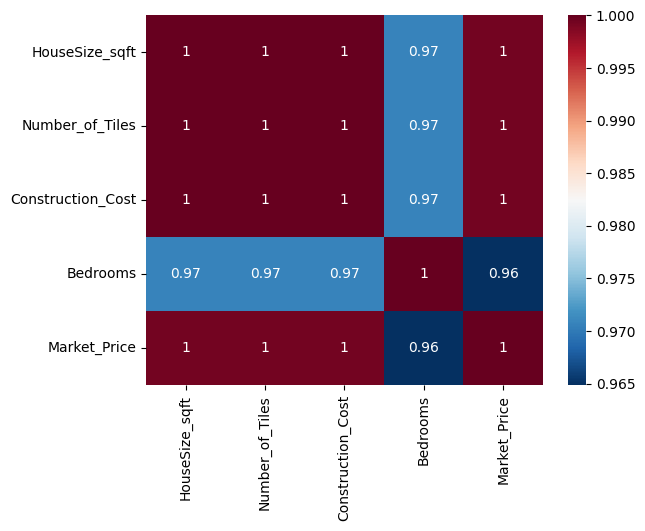

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(correlation_mat,annot=True,cmap='RdBu_r')
plt.show()

In [26]:
# Calculate correlation matrix
corr_matrix = df1.corr().abs()

# Exclude target column from correlation check
target_column = "Market_Price"

# Drop target row & column temporarily for checking multicollinearity
corr_features = corr_matrix.drop(index=target_column, columns=target_column)

# Select upper triangle
upper_triangle = corr_features.where(
    np.triu(np.ones(corr_features.shape), k=1).astype(bool)
)

# Find columns with correlation > 0.9
to_drop1 = [column for column in upper_triangle.columns
           if any(upper_triangle[column] > 0.9)]

print("Columns to remove:", to_drop1)

# Drop only those columns from original dataframe
df1_reduced = df1.drop(columns=to_drop1)

print("\nFinal Dataset:")
print(df1_reduced)


Columns to remove: ['Number_of_Tiles', 'Construction_Cost', 'Bedrooms']

Final Dataset:
   HouseSize_sqft  Market_Price
0            1000           2.0
1            1500           3.0
2            2000           4.1
3            2500           5.2
4            3000           6.1


# **Chi-Square Test**

In [27]:
X=pd.DataFrame({
    'gender':[0,1,0,1,1],
    'married':[1,1,0,0,1],
    'income':[20000,40000,50000,30000,60000]
})
y=[0,1,1,0,1]
X


,gender,married,income
0,0,1,20000
1,1,1,40000
2,0,0,50000
3,1,0,30000
4,1,1,60000


In [30]:
#chi-square requires non-negative values
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import MinMaxScaler

scalar=MinMaxScaler()
X_scaled=scalar.fit_transform(X)

selector=SelectKBest(score_func=chi2,k=2)
X_new=selector.fit_transform(X_scaled,y)
selected_features=X.columns[selector.get_support()]

print("Selected features:",selected_features);

Selected features: Index(['married', 'income'], dtype='object')


**Scenario: Loan Approval Classification**

You are building a classification model to predict whether a loan will be approved.

Dataset features:  
Gender (Male/Female)  
Marital Status (Yes/No)  
Education Level (Graduate/Non-Graduate)  
Applicant Income  
Property Area (Urban/Rural)  
Favorite Color  
Loan Status (Approved/Rejected)  

You want to identify which categorical features significantly influence loan approval.  
❓ Question:  
Which filter method is most appropriate here?  
Which type of features can be tested using this method?  
If “Favorite Color” has a very low chi-square score, what does it indicate?  
Why is chi-square suitable only for classification problems?  
 

In [31]:
import pandas as pd

df2 = pd.DataFrame({
    "Gender": [1, 0, 1, 0, 1],              # Male=1, Female=0
    "Marital_Status": [1, 0, 1, 0, 1],      # Yes=1, No=0
    "Education_Level": [1, 0, 1, 1, 0],     # Graduate=1
    "Applicant_Income": [5000, 3000, 4000, 3500, 6000],
    "Property_Area": [1, 0, 1, 0, 1],       # Urban=1
    "Favorite_Color": [0, 1, 2, 1, 0],      # Encoded manually (example)
    "Loan_Status": [1, 0, 1, 0, 1]          # Approved=1
})

df2


,Gender,Marital_Status,Education_Level,Applicant_Income,Property_Area,Favorite_Color,Loan_Status
0,1,1,1,5000,1,0,1
1,0,0,0,3000,0,1,0
2,1,1,1,4000,1,2,1
3,0,0,1,3500,0,1,0
4,1,1,0,6000,1,0,1


In [36]:
from sklearn.feature_selection import chi2

# Separate features and target
X1 = df2.drop("Loan_Status", axis=1)
y1 = df2["Loan_Status"]

# Apply chi-square
chi_scores, p_values = chi2(X1, y1)

# Display results
result = pd.DataFrame({
    "Feature": X1.columns,
    "Chi-Square Score": chi_scores,
    "P-Value": p_values
})

print("\nChi-Square Results:\n")
print(result.sort_values(by="Chi-Square Score", ascending=False))



Chi-Square Results:

            Feature  Chi-Square Score        P-Value
3  Applicant_Income        854.651163  7.085932e-188
0            Gender          2.000000   1.572992e-01
1    Marital_Status          2.000000   1.572992e-01
4     Property_Area          2.000000   1.572992e-01
5    Favorite_Color          0.166667   6.830914e-01
2   Education_Level          0.055556   8.136637e-01


 **Interpretation**

High Chi-Square Score → Strong influence on Loan_Status

Low Chi-Square Score → Weak influence

If Favorite_Color has very low score:

 It means favorite color has no relationship with loan approval  
 It should be removed